# Goedaardig vs kwaadaardige tumoren met maar 2 regressoren (inputs)

We voorspellen of een tumor goedaardig (_benign_ of kortweg _B_) is, of de patiënt weldegelijk borstkanker heeft en de tumor dus kwaardaardig (_malignant_ of kortweg _M_) is, maar we gebruiken __maar 2 regressoren__, zodat we de data kunnen plotten.

In [1]:
import numpy as np
# data inladen
import pandas as pd
from pandas import read_csv
# data opsplitsen in trainings-, validatie- en testset
from sklearn.model_selection import train_test_split
# grafieken
from matplotlib import pyplot as plt
# nodig voor het maken van het svm model
from sklearn import svm
# nodig om accuraatheid van de voorspellingen te bekijken
from sklearn import metrics

In [2]:
# We laden de data
gegevens = read_csv("data.csv")

# We genereren een random random_state
random_state = np.random.randint(100)

# We verdelen de data in 50% training, 25% validatie en 25% test
tmp, testData = train_test_split(gegevens, test_size=0.25, random_state=random_state)
trainingData, validatieData = train_test_split(tmp, test_size=0.33, random_state=random_state)

# Print the shapes of the resulting datasets
print(f"Grootte training data: \t{trainingData.shape} (50%)")
print(f"Grootte validatie data: {validatieData.shape} (25%)")
print(f"Grootte test data: \t{testData.shape} (25%)")


Grootte training data: 	(285, 33) (50%)
Grootte validatie data: (141, 33) (25%)
Grootte test data: 	(143, 33) (25%)


In [3]:
print(trainingData.head())

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
16     848406         M       14.680         20.13           94.74      684.5   
429  90769602         B       12.720         17.67           80.98      501.3   
135    868202         M       12.770         22.47           81.72      506.3   
505    915276         B        9.676         13.14           64.12      272.5   
174    871642         B       10.660         15.15           67.49      349.6   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
16           0.09867           0.07200         0.07395              0.05259   
429          0.07896           0.04522         0.01402              0.01835   
135          0.09055           0.05761         0.04711              0.02704   
505          0.12550           0.22040         0.11880              0.07038   
174          0.08792           0.04302         0.00000              0.00000   

     ...  texture_worst  perimeter_wor

In [4]:
# We tellen het aantal diagnoses in de training data
diagnosesTotaal = trainingData['diagnosis'].value_counts()

print(diagnosesTotaal)

aantalGoedaardig = diagnosesTotaal[0]
aantalKwaadaardig = diagnosesTotaal[1]

print(f"Er zijn {aantalGoedaardig} goedaardige tumoren en {aantalKwaadaardig} kwaadaardige tumoren in de training data.")

B    187
M     98
Name: diagnosis, dtype: int64
Er zijn 187 goedaardige tumoren en 98 kwaadaardige tumoren in de training data.


In [5]:
# We selecteren de kolommen met de features (x-waarden)
trainingFeatures = trainingData.iloc[:,2:4]
validatieFeatures = validatieData.iloc[:,2:4]
testFeatures = testData.iloc[:,2:4]

# We selecteren de kolom met de diagnoses (y-waarden)
trainingDiagnoses = trainingData.iloc[:,1]
validatieDiagnoses = validatieData.iloc[:,1]
testDiagnoses = testData.iloc[:,1]

In [6]:
# We halen de namen op van de inputs die we onderzoeken
input1 = trainingFeatures.columns[0]
input2 = trainingFeatures.columns[1]

In [7]:
print(trainingFeatures)

     radius_mean  texture_mean
16        14.680         20.13
429       12.720         17.67
135       12.770         22.47
505        9.676         13.14
174       10.660         15.15
..           ...           ...
566       16.600         28.08
500       15.040         16.74
336       12.990         14.23
2         19.690         21.25
74        12.310         16.52

[285 rows x 2 columns]


In [8]:
print(trainingDiagnoses)

16     M
429    B
135    M
505    B
174    B
      ..
566    M
500    B
336    B
2      M
74     B
Name: diagnosis, Length: 285, dtype: object


In [9]:
# we halen de waardes van de feautures op
trainingX = trainingFeatures.values
validatieX = validatieFeatures.values
testX = testFeatures.values

print(trainingX)

[[14.68  20.13 ]
 [12.72  17.67 ]
 [12.77  22.47 ]
 [ 9.676 13.14 ]
 [10.66  15.15 ]
 [11.89  21.17 ]
 [18.46  18.52 ]
 [19.18  22.49 ]
 [12.05  14.63 ]
 [11.47  16.03 ]
 [17.14  16.4  ]
 [13.5   12.71 ]
 [12.1   17.72 ]
 [13.17  18.66 ]
 [12.27  17.92 ]
 [19.55  23.21 ]
 [13.27  14.76 ]
 [16.14  14.86 ]
 [13.49  22.3  ]
 [11.67  20.02 ]
 [12.62  17.15 ]
 [11.41  10.82 ]
 [ 9.742 15.67 ]
 [12.87  19.54 ]
 [16.02  23.24 ]
 [14.87  20.21 ]
 [ 8.597 18.6  ]
 [ 9.029 17.33 ]
 [12.27  29.97 ]
 [13.    20.78 ]
 [10.6   18.95 ]
 [13.45  18.3  ]
 [ 9.876 17.27 ]
 [12.63  20.76 ]
 [16.65  21.38 ]
 [19.89  20.26 ]
 [12.16  18.03 ]
 [19.55  28.77 ]
 [12.34  12.27 ]
 [11.87  21.54 ]
 [15.66  23.2  ]
 [14.6   23.29 ]
 [11.43  17.31 ]
 [13.28  13.72 ]
 [ 9.397 21.68 ]
 [11.13  22.44 ]
 [15.53  33.56 ]
 [15.75  20.25 ]
 [13.61  24.98 ]
 [14.8   17.66 ]
 [13.85  17.21 ]
 [10.48  14.98 ]
 [11.51  23.93 ]
 [12.07  13.44 ]
 [13.62  23.23 ]
 [15.71  13.93 ]
 [13.46  18.75 ]
 [19.45  19.33 ]
 [11.37  18.89

In [10]:
# we halen de waardes van de diagnoses op
trainingY = trainingDiagnoses.values
validatieY = validatieDiagnoses.values
testY = testDiagnoses.values

print(trainingY)

['M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B

In [11]:
# Dit is de classifier of classificator
# We gebruiken de kernel trick om de data te kunnen scheiden
# In dit geval gebruiken we een lineaire kernel
clf = svm.SVC(kernel='linear')

# We trainen de classifier met de training data
clf.fit(trainingX,trainingY)

# We voorspellen de diagnoses van de validatie data
validatieVoorspellingen = clf.predict(validatieX)

print(validatieVoorspellingen)

['B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B']


In [12]:
# we berekenen de accuraatheid van de voorspellingen
accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)
print(f"De accuraatheid van de voorspellingen is {accuraatheid*100:.2f}%")

De accuraatheid van de voorspellingen is 87.23%


### Validatiegegevens gebruiken om de 3 meta-parameters te bepalen.

#### C-term<br>
De C-term staat voor de __foutentoleratie__ van het model.<br><br>
*Kleine waarden voor C:* <br>
Wanneer C klein is, laat het model meer fouten toe, waardoor de beslissingsgrens eenvoudiger wordt.<br><br>
*Grote waarden voor C:* <br>
Wanneer C groot is, laat het model een laag aantal fouten toe, waardoor de beslissingsgrens complexer wordt.<br>

In [13]:
# De C-term is een metaparameter en staat voor de foutentoleratie van het model.
mogelijkeCs = [c/10 for c in range(1, 100)]

hoogsteAccuraatheid = 0
cOpt = 0

# Overloop verschillende waarden voor C
for Ci in mogelijkeCs:

    clf = svm.SVC(kernel='linear', C=Ci)

    clf.fit(trainingX, trainingY)
    validatieVoorspellingen = clf.predict(validatieX)
    accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)

    print(f"De accuraatheid van de voorspellingen op de validatiedata is {accuraatheid*100:.5f}% met C={Ci}")

    if accuraatheid > hoogsteAccuraatheid:
        hoogsteAccuraatheid = accuraatheid
        cOpt = Ci

print(f"\nDe optimale waarde voor C is {cOpt} met een accuraatheid van {hoogsteAccuraatheid*100:.2f}%")

De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=0.1
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=0.2
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=0.3
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=0.4
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=0.5
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=0.6
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=0.7
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=0.8
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=0.9
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=1.0
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=1.1
De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met C=1.2
De accuraatheid van de voors

#### Kernel<br>
De kernel zegt het model welke 'trick' het het moet gebruiken om de data te scheiden.

In [14]:
# De kernel zegt het model welke 'trick' het het moet gebruiken om de data te scheiden.
mogelijkeKernels = ['linear', 'poly', 'rbf', 'sigmoid']

optKernel = ""
hoogsteAccuraatheid = 0

for kernel in mogelijkeKernels:

    clf = svm.SVC(kernel=kernel, C=cOpt)
    clf.fit(trainingX, trainingY)
    validatieVoorspellingen = clf.predict(validatieX)
    accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)

    print(f"De accuraatheid van de voorspellingen op de validatiedata is {accuraatheid*100:.5f}% met de kernel '{kernel}' en C={cOpt}")

    if accuraatheid > hoogsteAccuraatheid:
        hoogsteAccuraatheid = accuraatheid
        optKernel = kernel

print(f"\nDe optimale kernel is '{optKernel}' met een accuraatheid van {hoogsteAccuraatheid*100:.2f}% voor C={cOpt}")

De accuraatheid van de voorspellingen op de validatiedata is 87.23404% met de kernel 'linear' en C=0.1
De accuraatheid van de voorspellingen op de validatiedata is 88.65248% met de kernel 'poly' en C=0.1
De accuraatheid van de voorspellingen op de validatiedata is 82.26950% met de kernel 'rbf' en C=0.1
De accuraatheid van de voorspellingen op de validatiedata is 59.57447% met de kernel 'sigmoid' en C=0.1

De optimale kernel is 'poly' met een accuraatheid van 88.65% voor C=0.1


#### Gamma<br>
De $\gamma$ staat voor de __foutentoleratie__ van het model.<br><br>
*Kleine waarden voor $\gamma$:* <br>
Een te lage gamma-waarde kan leiden tot _overgeneralisatie_, waarbij de beslissingsgrens te eenvoudig is en het model niet goed presteert op de trainingsgegevens.<br><br>
*Grote waarden voor $\gamma$:* <br>
Een te hoge gamma-waarde kan leiden tot _overfitting_, waarbij het model de trainingsgegevens te nauw volgt en dus niet goed zal presteren op nog niet eerder geziene gegevens.<br>

In [15]:
# # De C-term is een metaparameter en staat voor de foutentoleratie van het model.
# mogelijkeGammas = [gamma for gamma in range(1, 10)]

# hoogsteAccuraatheid = 0
# gammaOpt = 0

# # Overloop verschillende waarden voor C
# for gamma in mogelijkeGammas:

#     clf = svm.SVC(kernel=optKernel, C=cOpt, gamma=gamma)
#     clf.fit(trainingX, trainingY)
#     validatieVoorspellingen = clf.predict(validatieX)
#     accuraatheid = metrics.accuracy_score(validatieY, validatieVoorspellingen)

#     print(f"De accuraatheid van de voorspellingen op de validatiedata is {accuraatheid*100:.5f}% met gamma={gamma}, de kernel '{optKernel}' en C={cOpt}")

#     if accuraatheid > hoogsteAccuraatheid:
#         hoogsteAccuraatheid = accuraatheid
#         gammaOpt = gamma

# print(f"\nDe optimale waarde voor gamma is {gammaOpt} met een accuraatheid van {hoogsteAccuraatheid*100:.2f}% voor de kernel '{optKernel}' en C={cOpt}")

### Toepassen op de testdata

In [16]:
clf = svm.SVC(kernel='linear', C=cOpt)
clf.fit(trainingX, trainingY)
testVoorspellingen = clf.predict(testX)
accuraatheid = metrics.accuracy_score(testY, testVoorspellingen)

# print(f"De accuraatheid van de voorspellingen op de testdata is {accuraatheid*100:.2f}% voor de kernel '{optKernel}', C={cOpt} en gamma={gammaOpt}")

### Visuele voorstelling

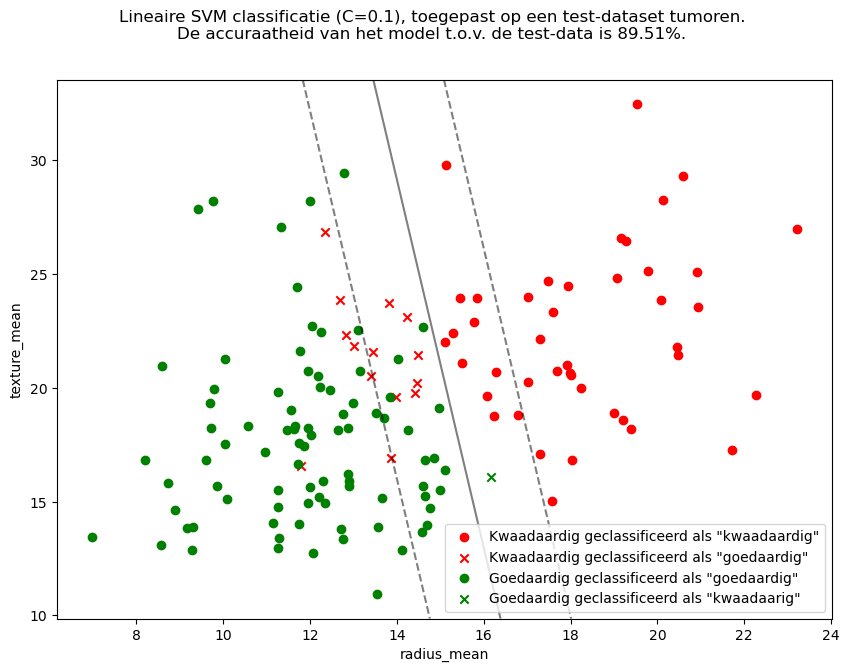

In [17]:
import matplotlib.pyplot as plt

# Punten die geclassificeerd worden als goedaardig maar kwaadaardig zijn
falsePositives = np.where((testVoorspellingen == 'B') & (testY == 'M'))
# Punten die geclassificeerd worden als goedaardig en ook goedaardig zijn
truePositives = np.where((testVoorspellingen == 'B') & (testY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig maar goedaardig zijn
falseNegatives = np.where((testVoorspellingen == 'M') & (testY == 'B'))
# Punten die geclassificeerd worden als kwaadaardig en ook kwaadaardig zijn
trueNegatives = np.where((testVoorspellingen == 'M') & (testY == 'M'))

plt.figure(figsize=(10, 7))
plt.suptitle(f"Lineaire SVM classificatie (C={cOpt}), toegepast op een test-dataset tumoren.\nDe accuraatheid van het model t.o.v. de test-data is {accuraatheid*100:.2f}%.")
plt.scatter(testX[trueNegatives, 0], testX[trueNegatives, 1], c='r', marker='o', label='Kwaadaardig geclassificeerd als "kwaadaardig"')
plt.scatter(testX[falsePositives, 0], testX[falsePositives, 1], c='r', marker='x', label='Kwaadaardig geclassificeerd als "goedaardig"')
plt.scatter(testX[truePositives, 0], testX[truePositives, 1], c='g', marker='o', label='Goedaardig geclassificeerd als "goedaardig"')
plt.scatter(testX[falseNegatives, 0], testX[falseNegatives, 1], c='g', marker='x', label='Goedaardig geclassificeerd als "kwaadaarig"')

# Beslissingslijn plotten
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel(input1)
plt.ylabel(input2)
plt.legend()
plt.savefig('svm-classificatie-2-inputs.pdf')
plt.show()